# <center>PANDAS  </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

> documentation of pd.read_csv 

In [2]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [3]:
df = pd.read_csv('../data/btc-market-price.csv', header = None, names = ['Timestamp', 'Price'])

In [4]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


> explicitly set the column names with: `df.columns` attribute 

In [5]:
df.shape

(365, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [7]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


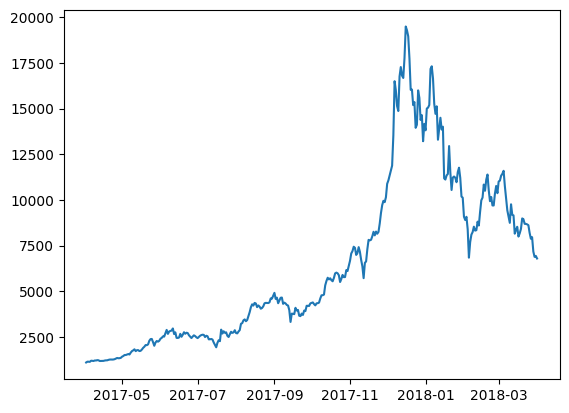

In [8]:
plt.plot(df['Timestamp'],  df['Price'])

<Axes: xlabel='Timestamp'>

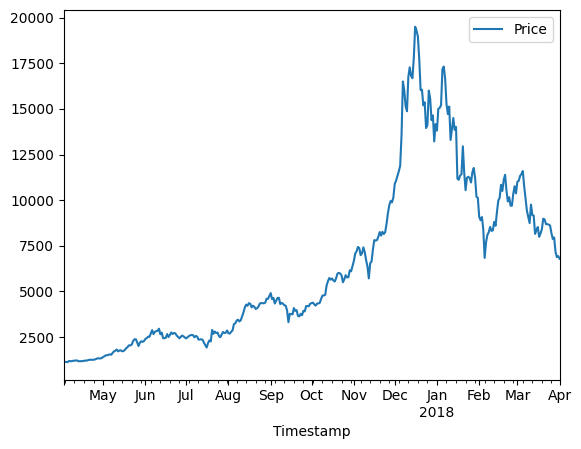

In [9]:
df_2 = pd.read_csv(     
    filepath_or_buffer = '../data/btc-market-price.csv',
    header = None,
    names = ['Timestamp', 'Price'],
    index_col = 0,
    parse_dates = True
    )
df_2.head()
df_2.plot()

In [10]:
df.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  365 non-null    datetime64[ns]
 1   Price      365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-04-02 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [11]:
df.index

RangeIndex(start=0, stop=365, step=1)

## Example 2: BTC & ETH

In [12]:
eth = pd.read_csv('../data/eth-price.csv', parse_dates = True, index_col = 0 )
eth.head()

,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


Creating a new **dataframe** `prices`: Which contains bitcoin & ether prices. 

In [13]:
prices = pd.DataFrame(index = df_2.index)
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


Add New Columns using price data from `df` and `eth`.

In [14]:
prices['Ether'] = eth['Value']
prices['Bitcoin'] = df_2['Price']

In [15]:
prices.tail()

,Ether,Bitcoin
Timestamp,,
2018-03-28,445.93,7960.380000
2018-03-29,383.90,7172.280000
2018-03-30,393.82,6882.531667
2018-03-31,394.07,6935.480000
2018-04-01,378.85,6794.105000


<Axes: xlabel='Timestamp'>

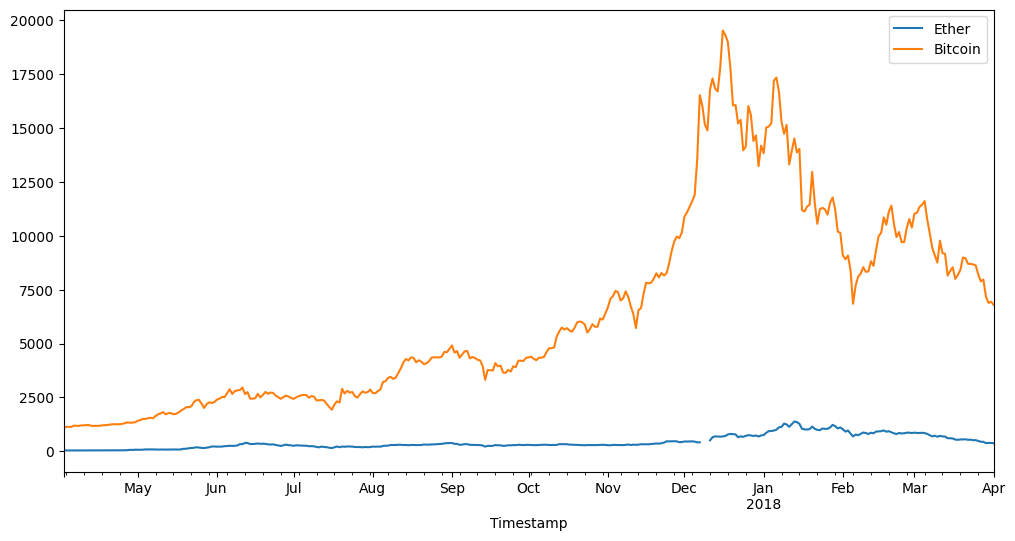

In [16]:
prices.plot(figsize=(12, 6))

> notice the gap, hence we **ENHANCE.** _(Interior Chinatown Lol)_

In [17]:
prices['2017-12-01':'2018-01-01']

,Ether,Bitcoin
Timestamp,,
2017-12-01,461.58,10883.912000
2017-12-02,457.96,11071.368333
2017-12-03,462.81,11332.622000
2017-12-04,466.93,11584.830000
2017-12-05,453.96,11878.433333
2017-12-06,422.48,13540.980000
2017-12-07,421.15,16501.971667
2017-12-08,NaN,16007.436667
2017-12-09,NaN,15142.834152


<Axes: xlabel='Timestamp'>

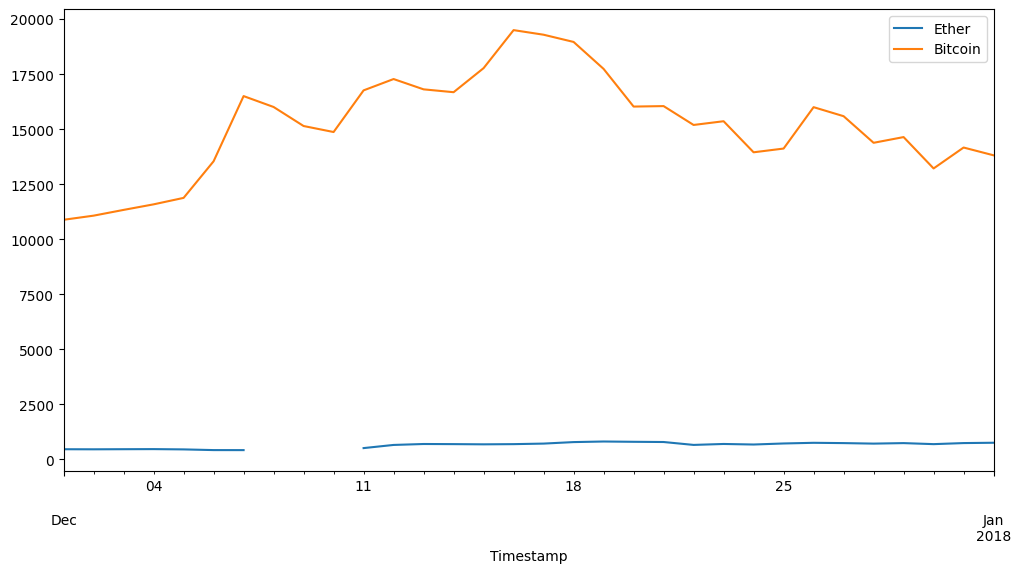

In [18]:
prices['2017-12-01':'2018-01-01'].plot(figsize = (12,6) )